# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful scikit-learn library

0. An end-to-end scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problem
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together
                                                                                                                                                                                    


In [7]:
what_were_covering = ["An end-to-end scikit-learn workflow", 
"Getting the data ready",
"Choose the right estimator/algorithm for our problem",
"Fit the model/algorithm and use it to make predictions on our data",
"Evaluating a model",
"Improve a model",
"Save and load a trained model",
"Putting it all together"
]

In [8]:
what_were_covering

['An end-to-end scikit-learn workflow',
 'Getting the data ready',
 'Choose the right estimator/algorithm for our problem',
 'Fit the model/algorithm and use it to make predictions on our data',
 'Evaluating a model',
 'Improve a model',
 'Save and load a trained model',
 'Putting it all together']

In [9]:
# Getting our data ready
import numpy as np
import pandas as pd

heart_disease = pd.read_csv('data/heart-disease.csv')


heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
# Create X (features matrix)
x = heart_disease.drop("target", axis=1)

# Create y (label)
y = heart_disease["target"]

In [11]:
# 2. Chosee the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
clf.fit(x_train, y_train);

In [14]:
y_preds = clf.predict(x_test)

In [15]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [16]:
#4. Evaluate the model on the training dat and test data 
clf.score(x_train, y_train)

1.0

In [17]:
clf.score(x_test, y_test)

0.8524590163934426

In [18]:
 # Another way of evaluating our model 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [19]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [20]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
 

Trying model with 10 estimators...
Model accuracy on test set: 85.25%
Trying model with 20 estimators...
Model accuracy on test set: 80.33%
Trying model with 30 estimators...
Model accuracy on test set: 83.61%
Trying model with 40 estimators...
Model accuracy on test set: 80.33%
Trying model with 50 estimators...
Model accuracy on test set: 86.89%
Trying model with 60 estimators...
Model accuracy on test set: 83.61%
Trying model with 70 estimators...
Model accuracy on test set: 83.61%
Trying model with 80 estimators...
Model accuracy on test set: 83.61%
Trying model with 90 estimators...
Model accuracy on test set: 81.97%


In [21]:
# 6. Save and load model
import pickle 
pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [22]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(x_test, y_test)

0.819672131147541

In [23]:
# clf.predict_proba(x_test)
# clf.predict(x_test)


## 1. Getting our data ready to be used for machine learing

# Three main things we have to do:
#    1. Split the data into features and labels (usually X and Y)
#    2. Filling (also called imputing) or disregarding missing values
#    3. Converting non-numerical values to numerical values (also called features encoding)

In [24]:
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
 x = heart_disease.drop("target", axis=1)
 y = heart_disease["target"]

In [26]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## 1.1 Make sure it's all numerical data


In [27]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
#Split into X/Y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)], 
                                remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
# Another method to convert to the numeric
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [31]:

# Split the data after converting the data
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3235867221569877

## 1.2 What if there were missing values?
1. Fill them with some value (also know as imputation)
2. Remove the samples with missing data altogether.

In [32]:
#import missing car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()


Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
# ##Imputation with pandas 

# # Fill the "Make" column
# car_sales_missing["Make"].fillna("missing")

# # Fill the "Colour" column
# car_sales_missing["Colour"].fillna("missing")

# # Fill the "Doors" column
# car_sales_missing["Doors"].fillna(4)

# # Fill the "Odometer (KM)" column
# car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

# # Remove those without price 
# car_sales_missing.dropna(inplace=True)
# # car_sales_missing.isna().sum()

##Imputation with scikit-learn

# Filling the missing data with scikit learning
car_sales_missing.dropna(subset=["Price"], inplace=True)
# car_sales_missing.isna().sum()

#Split into X & y 
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Fill categorical values with missing & numerical with mean
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

filled_x = imputer.fit_transform(x)

car_sales_filled = pd.DataFrame(filled_x, 
                                columns=["Make", "Colour",
                                         "Doors", "Odometer (KM)"
                                        ]
                               )
car_sales_filled.isna().sum()





Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [34]:
#split the data set
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [35]:
# Let's try and convert our data to numbers
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features)],
                                   remainder="passthrough"
                                   )
#transformed the data
# transformed_x = transformer.fit_transform(x)
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [36]:
# Fitting the model
np.random.seed(42)


#split data set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test, y_test)



0.21990196728583944

In [37]:
what_were_covering

['An end-to-end scikit-learn workflow',
 'Getting the data ready',
 'Choose the right estimator/algorithm for our problem',
 'Fit the model/algorithm and use it to make predictions on our data',
 'Evaluating a model',
 'Improve a model',
 'Save and load a trained model',
 'Putting it all together']

## 2.0 Choose the right estimator/algorithm for your problem


    

# 2.1 Picking a machine learning model for a regression problem


In [38]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [39]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [40]:
#Import algorithm/estimator
from sklearn.linear_model import Ridge
from sklearn import svm

#setup random seed
np.random.seed(42)

#Create the data 
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate the model and fit with data

model = Ridge()
# model = svm.SVR()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5758549611440126

### What if Ridge didn't work or the score didn't fit our needs?

We could always try a different model

How about try an ensemble model (an ensemble model is combineation of small models)


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Setup randowm seed
np.random.seed(42)

#Create the data 
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8066196804802649

# Classification model


In [42]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
len(heart_disease)

303

In [44]:
#import estimator
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# seed
np.random.seed(42)

# data 
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate the model
# clf = RandomForestClassifier()
clf = LinearSVC()

clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8688524590163934

# Tidbit:
    1. If you have structured data, used ensemble methos
    2. If you have unstructured data, use deep learning or transfer learning

In [45]:
what_were_covering

['An end-to-end scikit-learn workflow',
 'Getting the data ready',
 'Choose the right estimator/algorithm for our problem',
 'Fit the model/algorithm and use it to make predictions on our data',
 'Evaluating a model',
 'Improve a model',
 'Save and load a trained model',
 'Putting it all together']

## 3. Fit the model/algorithm on our data and use it to make prediction

# 3.1 Fitting the model to the data

Different name for x and y
* `x` = features, features variables, data
* `y` = labels, targets, target variables


In [46]:
#import estimator
from sklearn.ensemble import RandomForestClassifier

# seed
np.random.seed(42)

# data 
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate the model
clf = RandomForestClassifier()

clf.fit(x_train, y_train)
print(clf.predict(x_test))
print(clf.predict_proba(x_test))
clf.score(x_test, y_test)

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
[[0.89 0.11]
 [0.49 0.51]
 [0.43 0.57]
 [0.84 0.16]
 [0.18 0.82]
 [0.14 0.86]
 [0.36 0.64]
 [0.95 0.05]
 [0.99 0.01]
 [0.47 0.53]
 [0.26 0.74]
 [0.7  0.3 ]
 [0.11 0.89]
 [0.95 0.05]
 [0.03 0.97]
 [0.02 0.98]
 [0.01 0.99]
 [0.84 0.16]
 [0.95 0.05]
 [0.98 0.02]
 [0.51 0.49]
 [0.89 0.11]
 [0.38 0.62]
 [0.29 0.71]
 [0.26 0.74]
 [0.34 0.66]
 [0.2  0.8 ]
 [0.22 0.78]
 [0.83 0.17]
 [0.15 0.85]
 [0.94 0.06]
 [0.92 0.08]
 [0.96 0.04]
 [0.62 0.38]
 [0.46 0.54]
 [0.89 0.11]
 [0.44 0.56]
 [0.16 0.84]
 [0.33 0.67]
 [0.08 0.92]
 [0.13 0.87]
 [0.17 0.83]
 [0.18 0.82]
 [0.38 0.62]
 [0.32 0.68]
 [0.77 0.23]
 [0.39 0.61]
 [0.   1.  ]
 [0.83 0.17]
 [0.97 0.03]
 [0.85 0.15]
 [0.8  0.2 ]
 [0.25 0.75]
 [0.25 0.75]
 [0.87 0.13]
 [0.93 0.07]
 [0.71 0.29]
 [0.01 0.99]
 [0.87 0.13]
 [1.   0.  ]
 [0.86 0.14]]


0.8524590163934426

In [47]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split data set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the model 
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

# predict the value
y_predict = model.predict(x_test)
y_predict[1:11]

array([0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701, 2.34323  ,
       1.66182  , 2.47489  , 4.8344779, 1.17707  ])

In [48]:
# Comparing the target with y_predict if is same format
np.array(y_test[1:11])

array([0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  , 1.575  ,
       3.4    , 4.466  , 1.232  ])

## Evaluating our model with mean_absolute_error 


In [49]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predict)

0.3265721842781009

In [50]:
what_were_covering

['An end-to-end scikit-learn workflow',
 'Getting the data ready',
 'Choose the right estimator/algorithm for our problem',
 'Fit the model/algorithm and use it to make predictions on our data',
 'Evaluating a model',
 'Improve a model',
 'Save and load a trained model',
 'Putting it all together']

## 4. Evaluating a machine learning model 

There are three way to evaluate scikit-learn models/estimators
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions
   

In [51]:
# 1. Estimator's built-in `score()` method on classification problem

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier()

# Fit classifier to training data
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

# The highest value for the .score() method is 1.0, the lowest is 0.0 
# clf.score(x_train, y_train)

0.8524590163934426

In [52]:
# 1. Estimator's built-in `score()` method on regression problem

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create x & y
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Create train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestRegressor(n_estimators=100)

# Fit classifier to training data
clf.fit(x_train, y_train)
clf.score(x_test, y_test)
    
# The highest value for the .score() method is 1.0, the lowest is 0.0 
# clf.score(x_train, y_train)

0.8066196804802649

## NB: 

The default score() evaluation metric is `r_squared` for regression algorithm

while 

The default score() evaluation metric is `mean accuracy` for classification algorithm

# Highest = 1.0, lowest = 0.0

 ## 4.2 Evaluating a model using the scoring parameter (Cross validation)
 

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 

np.random.seed(42)

# Create X & y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier()

# Fit classifier to training data
clf.fit(x_train, y_train)

# Cross validation score 
# cross_val_score(clf, x, y, cv=10)

# Compare score and cross validation score
clf_single_score = clf.score(x_test, y_test)
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=10)) 

# Comparing the 2 scores
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8180645161290322)

# 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

# Accuracy

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, x, y, cv=5)

In [55]:
print(f"Hearth Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Hearth Disease Classifier Cross-Validated Accuracy: 82.48%


**Evaluation: Using Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparision of a model's true positive rate (tpr) versus a models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [56]:
# Create x_test and y_test etc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

#import roc_curve
from sklearn.metrics import roc_curve

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit the model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#Make prediction with probability
y_probs = clf.predict_proba(x_test)


y_probs[:10]


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [57]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [58]:
# calculate fpr, tpr and threshods
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr[:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552])

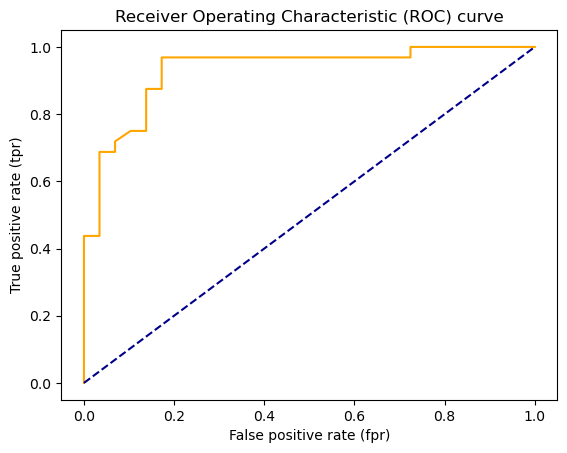

In [59]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """

    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    #Plot line with no predictive power (baseine)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.show()

plot_roc_curve(fpr, tpr)

In [60]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

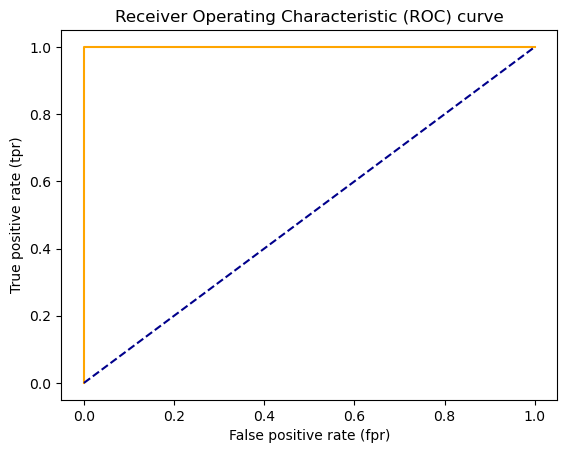

In [61]:
# Plot perfect ROC curve and AUC score
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [62]:
roc_auc_score(y_test, y_test)

1.0

# Confuse matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it suppose to predict


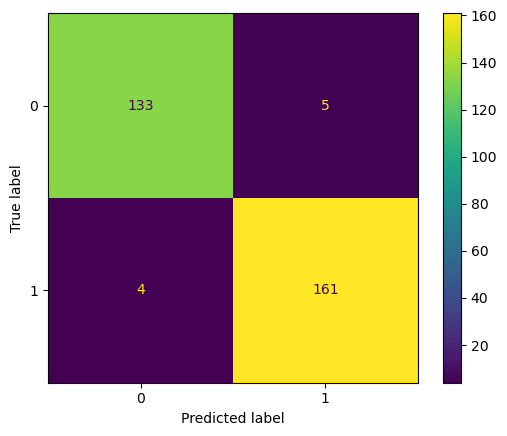

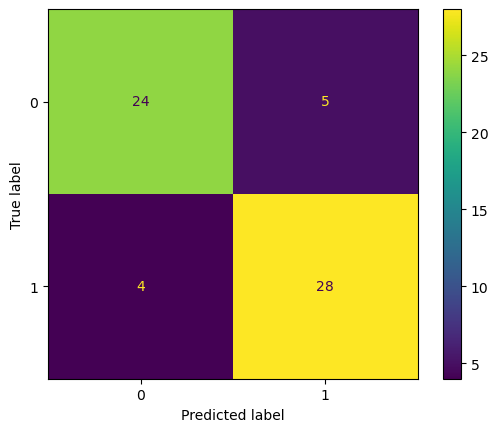

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

y_preds = clf.predict(x_test)

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y)
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

In [64]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds,
            rownames=["Actual Labels"],
            colnames=["Pedicted Labels"])

Pedicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [65]:
# How to install a conda package into the current environtment in jupyter notebook
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

# #Make our confusion matrix more visual with Seaborn's heatmap()
# import seaborn as sns

# #Set the font sce 
# sns.set(font_scale=1.5)

# conf_mat = confusion_matrix(y_test, y_preds)

# #Plot it using seaborn
# sns.heatmap(conf_mat)


# Classification Report

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### 4.2.2 Regression model evaluation

 The one going to cover are:
 1. R^2 (pronounced r-squared) or cofficient of determination (Defualt metric for regression)
 2. Mean absolute error (MAE)
 3. Mean squared error


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train, y_train)

model.score(x_test, y_test)

y_preds = model.predict(x_test)


In [68]:
y_test.mean()

2.0550030959302323

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

r2_score(y_true=y_test,
        y_pred=y_preds)


mae = mean_absolute_error(y_true=y_test,
        y_pred=y_preds)

mse = mean_squared_error(y_true=y_test,
        y_pred=y_preds)


 ### Mean absolute error


In [70]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [71]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]

np.abs(df["differences"]).mean()


0.3265721842781009

## Mean squared error

In [72]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [73]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]

np.square(df["differences"]).mean()

0.2534073069137548

## 4.2.3 Finally using the scoring parameter

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()


### Cross-validation accuracy

In [75]:
np.random.seed(42)

cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [76]:
# Accuracy
np.random.seed(42)

cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc
print(f"The cross-validated accuracy is: {np.mean(cv_acc)}")

The cross-validated accuracy is: 0.8248087431693989


In [77]:
# Precision
np.random.seed(42)

cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [78]:
# Accuracy
np.random.seed(42)

cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")

cv_recall
print(f"The cross-validated accuracy is: {np.mean(cv_recall)}")

The cross-validated accuracy is: 0.8545454545454545


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()


In [80]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545756342466266

In [81]:
# Mean absolute error

np.random.seed(42)
cv_mae = cross_val_score(model, x, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4835493810852714

In [82]:
# Mean squared error

np.random.seed(42)
cv_mse = cross_val_score(model, x, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4613720134531419

  ## 4.3 Using different evaluation metrics as Scikit-learn functions
  ### The 3rd way to evaluate scikit-learn machine learning models/estimators is using the sklearn.metrics module

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Create x & y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split date 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_preds = clf.predict(x_test)

# Accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [84]:
# precision_score
precision_score(y_test, y_preds)

0.8484848484848485

In [85]:
# recall_score
recall_score(y_test, y_preds)

0.875

In [86]:
# f1_score
f1_score(y_test, y_preds)

0.8615384615384616

In [87]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Create x & y
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(x_train, y_train)
y_preds = model.predict(x_test)

# Evaluate model using evaluation functions




In [88]:
# r2_score
r2_score(y_test, y_preds)

0.8066196804802649

In [89]:
# mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

In [90]:
# mean_squared_error
mean_squared_error(y_test, y_preds)

0.2534073069137548

## 5. Improving a model

* First predictions = baseline predictions.
* First Model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From model perspective 
* Is there a better model could use?
* Could we improve the current model?

Hyperparameters Vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = setting on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters
1. By handle
2. Randomly with RandomSearchCV
3. Exhautively with GridSearchCV



In [91]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [92]:
def evaluate_predicts(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
    "accurary": round(accuracy, 2),
    "precision" : round(precision, 2),
    "recall": round(recall, 2),
    "f1": round(f1, 2)
    }
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [93]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data 
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data

valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 70% - 85% of data

x_train, y_train = x[:train_split], y[:train_split]  

x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]

x_test, y_test = x[valid_split:], y[valid_split:]


# Split the data into train, validation & test sets
clf = RandomForestClassifier()

clf.fit(x_train, y_train)

# Make baseline prediction
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_predicts(y_valid, y_preds)




Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


In [94]:
# Create a second classifier with different hyperparameters
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=50)
clf_2.fit(x_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the classifier on validation set 2
baseline_metrics_2 = evaluate_predicts(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

grid = {"n_estimators": [10, 100, 200, 500, 1000, 12000],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto","sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf":[1,2,4]}

np.random.seed(42)

# Split into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2)

print("Starting RandomizedSearchCV fitting...")

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,
                           cv=2,
                           verbose=2)


rs_clf.fit(x_train, y_train)
print("RandomizedSearchCV fitting complete.")

Starting RandomizedSearchCV fitting...
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=12000; total time=  27.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=12000; total time=  27.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf

/Users/mac/Documents/Learning/machine-learning/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
8 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mac/Documents/Learning/machine-learning/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mac/Documents/Learning/machine-learning/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/mac/Documents/Learning/machine-learning/env/lib/python3.12/sit

RandomizedSearchCV fitting complete.


In [96]:
rs_clf.best_params_

{'n_estimators': 12000,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [105]:
# Make predictions with the best hyperparameter
rs_y_preds = rs_clf.predict(x_test)

rs_metrics = evaluate_predicts(y_test, rs_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


### Hyperparameter tunning with GridSearchCV

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

grid_2 = {'n_estimators': [ 100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [ 6],
 'min_samples_leaf': [1, 2  ]}


np.random.seed(42)

# Split into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2)



# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

print("Starting RandomizedSearchCV fitting...")
gs_clf.fit(x_train, y_train)
print("RandomizedSearchCV fitting complete.")

Starting RandomizedSearchCV fitting...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, mi

/Users/mac/Documents/Learning/machine-learning/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mac/Documents/Learning/machine-learning/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mac/Documents/Learning/machine-learning/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/mac/Documents/Learning/machine-learning/env/lib/python3.12/s

RandomizedSearchCV fitting complete.


In [110]:
gs_y_preds =gs_clf.predict(x_test)

# Evaluate the prediction
gs_metrics = evaluate_predicts(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### Let's compare our different model metrics

<Axes: >

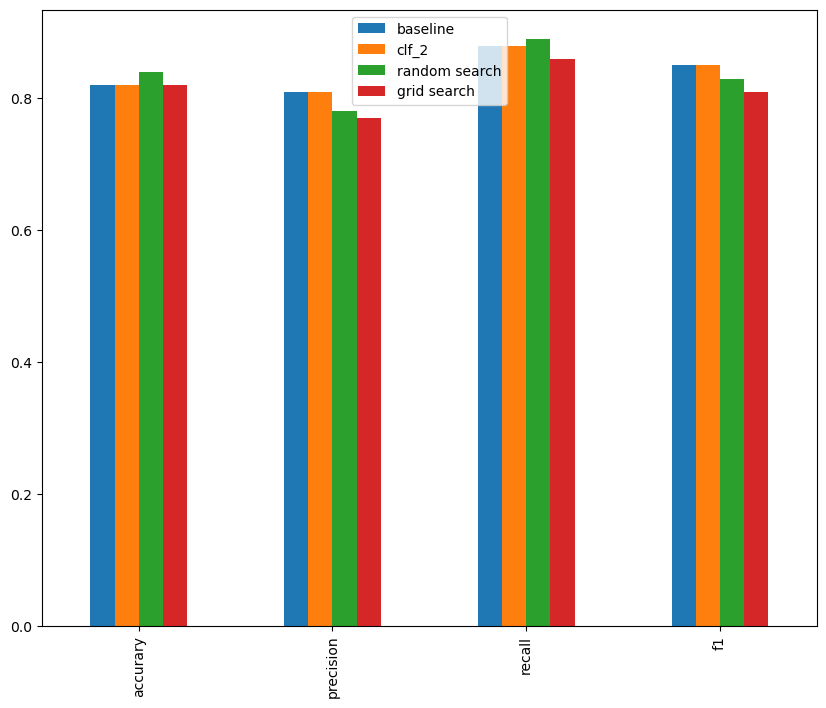

In [111]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": baseline_metrics_2,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and loading trained machine learning models

1. With Python's pickle module
2. With joblib module

Pickle




In [113]:
# Save an existing model to file
import pickle

pickle.dump(gs_clf, open("gs_random_forest_model_1.pk1", "wb"))

In [114]:
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pk1", "rb"))

pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_predicts(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accurary': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

### Joblib

In [116]:
from joblib import dump, load

# save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [118]:
# Import a saved joblib model
# loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

# joblib_y_preds = loaded_joblib_model(x_test)
# evaluate_predicts(y_test, joblib_y_preds)